In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelBinarizer, MinMaxScaler
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
import joblib

In [2]:
iris = pd.read_csv('DATA/iris.csv')

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
X = iris.drop('species', axis=1)

In [5]:
y = iris['species']

In [7]:
encoder = LabelBinarizer()

In [8]:
y = encoder.fit_transform(y)

In [9]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

#### train test split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

#### Scale the data

In [15]:
scaler = MinMaxScaler()

In [18]:
scaled_X_train = scaler.fit_transform(X_train)

In [19]:
scaled_X_test = scaler.transform(X_test)

#### Modeling

In [22]:
model = Sequential()
model.add(Dense(4, activation='relu', input_shape=[4,]))
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#### Train the model

In [24]:
early_stop = EarlyStopping(monitor='val_loss', patience=10)

In [25]:
model.fit(scaled_X_train, y_train, epochs=300, 
         validation_data=(scaled_X_test, y_test),
         callbacks=[early_stop])

Epoch 1/300
4/4 [==============================] - 2s 136ms/step - loss: 1.1087 - accuracy: 0.3500 - val_loss: 1.1221 - val_accuracy: 0.2667
Epoch 2/300
4/4 [==============================] - 0s 23ms/step - loss: 1.1063 - accuracy: 0.3500 - val_loss: 1.1194 - val_accuracy: 0.2667
Epoch 3/300
4/4 [==============================] - 0s 16ms/step - loss: 1.1038 - accuracy: 0.3500 - val_loss: 1.1172 - val_accuracy: 0.2667
Epoch 4/300
4/4 [==============================] - 0s 10ms/step - loss: 1.1017 - accuracy: 0.3500 - val_loss: 1.1147 - val_accuracy: 0.2667
Epoch 5/300
4/4 [==============================] - 0s 11ms/step - loss: 1.0992 - accuracy: 0.3500 - val_loss: 1.1122 - val_accuracy: 0.2667
Epoch 6/300
4/4 [==============================] - 0s 12ms/step - loss: 1.0970 - accuracy: 0.3500 - val_loss: 1.1098 - val_accuracy: 0.2667
Epoch 7/300
4/4 [==============================] - 0s 17ms/step - loss: 1.0949 - accuracy: 0.3500 - val_loss: 1.1074 - val_accuracy: 0.2667
Epoch 8/300
4/4 [==

4/4 [==============================] - 0s 10ms/step - loss: 0.8700 - accuracy: 0.6833 - val_loss: 0.9070 - val_accuracy: 0.6000
Epoch 60/300
4/4 [==============================] - 0s 11ms/step - loss: 0.8655 - accuracy: 0.6833 - val_loss: 0.9035 - val_accuracy: 0.6000
Epoch 61/300
4/4 [==============================] - 0s 11ms/step - loss: 0.8612 - accuracy: 0.6833 - val_loss: 0.8998 - val_accuracy: 0.6000
Epoch 62/300
4/4 [==============================] - 0s 11ms/step - loss: 0.8569 - accuracy: 0.6833 - val_loss: 0.8959 - val_accuracy: 0.6000
Epoch 63/300
4/4 [==============================] - 0s 10ms/step - loss: 0.8526 - accuracy: 0.6833 - val_loss: 0.8918 - val_accuracy: 0.6000
Epoch 64/300
4/4 [==============================] - 0s 10ms/step - loss: 0.8482 - accuracy: 0.6833 - val_loss: 0.8878 - val_accuracy: 0.6000
Epoch 65/300
4/4 [==============================] - 0s 11ms/step - loss: 0.8439 - accuracy: 0.6833 - val_loss: 0.8839 - val_accuracy: 0.6000
Epoch 66/300
4/4 [========

4/4 [==============================] - 0s 15ms/step - loss: 0.6478 - accuracy: 0.6833 - val_loss: 0.7017 - val_accuracy: 0.6000
Epoch 118/300
4/4 [==============================] - 0s 15ms/step - loss: 0.6449 - accuracy: 0.6833 - val_loss: 0.6988 - val_accuracy: 0.6000
Epoch 119/300
4/4 [==============================] - 0s 16ms/step - loss: 0.6418 - accuracy: 0.6833 - val_loss: 0.6959 - val_accuracy: 0.6000
Epoch 120/300
4/4 [==============================] - 0s 15ms/step - loss: 0.6390 - accuracy: 0.6833 - val_loss: 0.6932 - val_accuracy: 0.6000
Epoch 121/300
4/4 [==============================] - 0s 11ms/step - loss: 0.6360 - accuracy: 0.6833 - val_loss: 0.6904 - val_accuracy: 0.6000
Epoch 122/300
4/4 [==============================] - 0s 10ms/step - loss: 0.6331 - accuracy: 0.6833 - val_loss: 0.6878 - val_accuracy: 0.6000
Epoch 123/300
4/4 [==============================] - 0s 10ms/step - loss: 0.6303 - accuracy: 0.6833 - val_loss: 0.6851 - val_accuracy: 0.6000
Epoch 124/300
4/4 [=

Epoch 175/300
4/4 [==============================] - 0s 14ms/step - loss: 0.5192 - accuracy: 0.7083 - val_loss: 0.5692 - val_accuracy: 0.6333
Epoch 176/300
4/4 [==============================] - 0s 14ms/step - loss: 0.5176 - accuracy: 0.7083 - val_loss: 0.5674 - val_accuracy: 0.6333
Epoch 177/300
4/4 [==============================] - 0s 13ms/step - loss: 0.5160 - accuracy: 0.7083 - val_loss: 0.5655 - val_accuracy: 0.6667
Epoch 178/300
4/4 [==============================] - 0s 11ms/step - loss: 0.5144 - accuracy: 0.7083 - val_loss: 0.5639 - val_accuracy: 0.6667
Epoch 179/300
4/4 [==============================] - 0s 9ms/step - loss: 0.5130 - accuracy: 0.7083 - val_loss: 0.5622 - val_accuracy: 0.6667
Epoch 180/300
4/4 [==============================] - 0s 9ms/step - loss: 0.5115 - accuracy: 0.7167 - val_loss: 0.5605 - val_accuracy: 0.6667
Epoch 181/300
4/4 [==============================] - 0s 10ms/step - loss: 0.5100 - accuracy: 0.7250 - val_loss: 0.5589 - val_accuracy: 0.6667
Epoch 18

Epoch 233/300
4/4 [==============================] - 0s 20ms/step - loss: 0.4497 - accuracy: 0.7583 - val_loss: 0.4916 - val_accuracy: 0.7000
Epoch 234/300
4/4 [==============================] - 0s 17ms/step - loss: 0.4488 - accuracy: 0.7583 - val_loss: 0.4908 - val_accuracy: 0.7000
Epoch 235/300
4/4 [==============================] - 0s 17ms/step - loss: 0.4479 - accuracy: 0.7583 - val_loss: 0.4896 - val_accuracy: 0.7333
Epoch 236/300
4/4 [==============================] - 0s 17ms/step - loss: 0.4470 - accuracy: 0.7583 - val_loss: 0.4887 - val_accuracy: 0.7333
Epoch 237/300
4/4 [==============================] - 0s 16ms/step - loss: 0.4461 - accuracy: 0.7583 - val_loss: 0.4877 - val_accuracy: 0.7333
Epoch 238/300
4/4 [==============================] - 0s 15ms/step - loss: 0.4452 - accuracy: 0.7583 - val_loss: 0.4868 - val_accuracy: 0.7333
Epoch 239/300
4/4 [==============================] - 0s 16ms/step - loss: 0.4443 - accuracy: 0.7667 - val_loss: 0.4857 - val_accuracy: 0.7333
Epoch 

Epoch 291/300
4/4 [==============================] - 0s 11ms/step - loss: 0.4061 - accuracy: 0.8333 - val_loss: 0.4404 - val_accuracy: 0.9000
Epoch 292/300
4/4 [==============================] - 0s 12ms/step - loss: 0.4055 - accuracy: 0.8333 - val_loss: 0.4397 - val_accuracy: 0.9000
Epoch 293/300
4/4 [==============================] - 0s 10ms/step - loss: 0.4049 - accuracy: 0.8333 - val_loss: 0.4390 - val_accuracy: 0.9000
Epoch 294/300
4/4 [==============================] - 0s 10ms/step - loss: 0.4042 - accuracy: 0.8333 - val_loss: 0.4381 - val_accuracy: 0.9000
Epoch 295/300
4/4 [==============================] - 0s 10ms/step - loss: 0.4036 - accuracy: 0.8333 - val_loss: 0.4375 - val_accuracy: 0.9000
Epoch 296/300
4/4 [==============================] - 0s 10ms/step - loss: 0.4030 - accuracy: 0.8333 - val_loss: 0.4367 - val_accuracy: 0.9000
Epoch 297/300
4/4 [==============================] - 0s 10ms/step - loss: 0.4024 - accuracy: 0.8333 - val_loss: 0.4360 - val_accuracy: 0.9000
Epoch 

In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 3)                 15        
                                                                 
Total params: 35
Trainable params: 35
Non-trainable params: 0
_________________________________________________________________


In [27]:
metrics = pd.DataFrame(model.history.history)

In [28]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.108741,0.350000,1.122145,0.266667
1,1.106265,0.350000,1.119431,0.266667
2,1.103775,0.350000,1.117185,0.266667
3,1.101672,0.350000,1.114669,0.266667
4,1.099233,0.350000,1.112214,0.266667
...,...,...,...,...
295,0.402974,0.833333,0.436714,0.900000
296,0.402356,0.833333,0.435957,0.900000
297,0.401766,0.833333,0.435178,0.900000
298,0.401141,0.833333,0.434464,0.900000


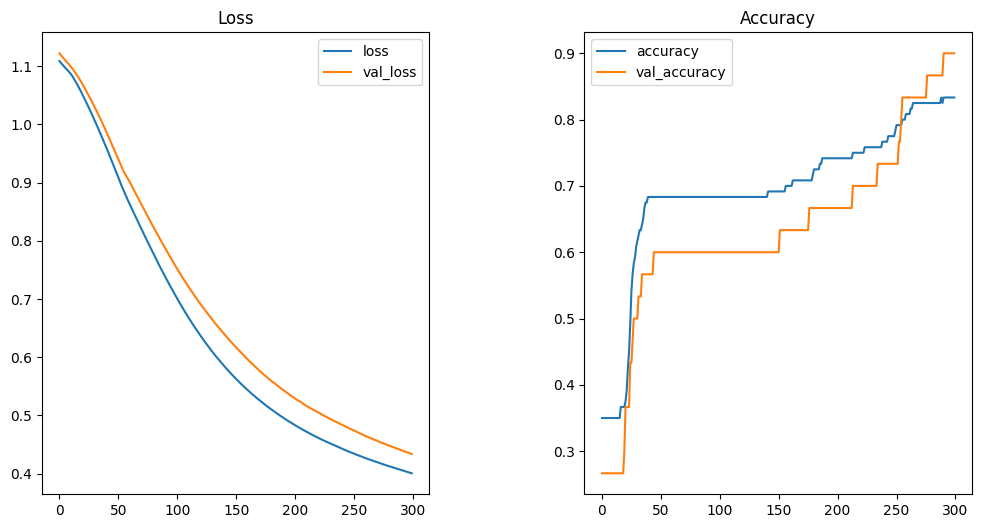

In [35]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot 'loss' and 'val_loss' on the first subplot
metrics[['loss', 'val_loss']].plot(ax=ax1)
ax1.set_title('Loss')

# Plot 'accuracy' and 'val_accuracy' on the second subplot
metrics[['accuracy', 'val_accuracy']].plot(ax=ax2)
ax2.set_title('Accuracy')

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.4)

# Display the figure
plt.show()


In [36]:
model.evaluate(scaled_X_test, y_test, verbose=0)

[0.4337133467197418, 0.8999999761581421]

In [38]:
model.metrics_names

['loss', 'accuracy']

#### Readying the model for deployment

In [40]:
epochs = len(metrics)

In [41]:
epochs

300

In [42]:
scaled_X = scaler.fit_transform(X)

In [43]:
#retrain the model
model = Sequential()
model.add(Dense(4, activation='relu', input_shape=[4,]))
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [44]:
model.fit(scaled_X, y, epochs=epochs)

Epoch 1/300
5/5 [==============================] - 1s 5ms/step - loss: 1.0345 - accuracy: 0.3333
Epoch 2/300
5/5 [==============================] - 0s 5ms/step - loss: 1.0283 - accuracy: 0.3333
Epoch 3/300
5/5 [==============================] - 0s 6ms/step - loss: 1.0221 - accuracy: 0.3333
Epoch 4/300
5/5 [==============================] - 0s 5ms/step - loss: 1.0157 - accuracy: 0.3333
Epoch 5/300
5/5 [==============================] - 0s 5ms/step - loss: 1.0098 - accuracy: 0.3400
Epoch 6/300
5/5 [==============================] - 0s 4ms/step - loss: 1.0034 - accuracy: 0.3467
Epoch 7/300
5/5 [==============================] - 0s 5ms/step - loss: 0.9975 - accuracy: 0.3533
Epoch 8/300
5/5 [==============================] - 0s 5ms/step - loss: 0.9913 - accuracy: 0.3733
Epoch 9/300
5/5 [==============================] - 0s 4ms/step - loss: 0.9853 - accuracy: 0.3733
Epoch 10/300
5/5 [==============================] - 0s 5ms/step - loss: 0.9797 - accuracy: 0.3800
Epoch 11/300
5/5 [===========

5/5 [==============================] - 0s 3ms/step - loss: 0.6165 - accuracy: 0.7067
Epoch 85/300
5/5 [==============================] - 0s 3ms/step - loss: 0.6129 - accuracy: 0.7067
Epoch 86/300
5/5 [==============================] - 0s 3ms/step - loss: 0.6094 - accuracy: 0.7133
Epoch 87/300
5/5 [==============================] - 0s 3ms/step - loss: 0.6059 - accuracy: 0.7133
Epoch 88/300
5/5 [==============================] - 0s 3ms/step - loss: 0.6024 - accuracy: 0.7133
Epoch 89/300
5/5 [==============================] - 0s 3ms/step - loss: 0.5990 - accuracy: 0.7133
Epoch 90/300
5/5 [==============================] - 0s 2ms/step - loss: 0.5956 - accuracy: 0.7133
Epoch 91/300
5/5 [==============================] - 0s 2ms/step - loss: 0.5923 - accuracy: 0.7133
Epoch 92/300
5/5 [==============================] - 0s 1ms/step - loss: 0.5890 - accuracy: 0.7133
Epoch 93/300
5/5 [==============================] - 0s 2ms/step - loss: 0.5860 - accuracy: 0.7133
Epoch 94/300
5/5 [===============

5/5 [==============================] - 0s 4ms/step - loss: 0.4421 - accuracy: 0.8467
Epoch 167/300
5/5 [==============================] - 0s 4ms/step - loss: 0.4408 - accuracy: 0.8467
Epoch 168/300
5/5 [==============================] - 0s 4ms/step - loss: 0.4396 - accuracy: 0.8467
Epoch 169/300
5/5 [==============================] - 0s 3ms/step - loss: 0.4383 - accuracy: 0.8600
Epoch 170/300
5/5 [==============================] - 0s 3ms/step - loss: 0.4371 - accuracy: 0.8533
Epoch 171/300
5/5 [==============================] - 0s 4ms/step - loss: 0.4358 - accuracy: 0.8533
Epoch 172/300
5/5 [==============================] - 0s 3ms/step - loss: 0.4347 - accuracy: 0.8533
Epoch 173/300
5/5 [==============================] - 0s 2ms/step - loss: 0.4333 - accuracy: 0.8600
Epoch 174/300
5/5 [==============================] - 0s 3ms/step - loss: 0.4320 - accuracy: 0.8667
Epoch 175/300
5/5 [==============================] - 0s 2ms/step - loss: 0.4309 - accuracy: 0.8667
Epoch 176/300
5/5 [=====

5/5 [==============================] - 0s 2ms/step - loss: 0.3375 - accuracy: 0.8867
Epoch 249/300
5/5 [==============================] - 0s 2ms/step - loss: 0.3363 - accuracy: 0.8867
Epoch 250/300
5/5 [==============================] - 0s 3ms/step - loss: 0.3352 - accuracy: 0.8867
Epoch 251/300
5/5 [==============================] - 0s 1ms/step - loss: 0.3337 - accuracy: 0.8867
Epoch 252/300
5/5 [==============================] - 0s 2ms/step - loss: 0.3327 - accuracy: 0.8867
Epoch 253/300
5/5 [==============================] - 0s 2ms/step - loss: 0.3314 - accuracy: 0.8867
Epoch 254/300
5/5 [==============================] - 0s 3ms/step - loss: 0.3301 - accuracy: 0.8867
Epoch 255/300
5/5 [==============================] - 0s 2ms/step - loss: 0.3289 - accuracy: 0.8867
Epoch 256/300
5/5 [==============================] - 0s 1ms/step - loss: 0.3280 - accuracy: 0.8867
Epoch 257/300
5/5 [==============================] - 0s 2ms/step - loss: 0.3264 - accuracy: 0.8867
Epoch 258/300
5/5 [=====

#### Save the model

In [45]:
model.save('final_iris_model.h5')

In [47]:
joblib.dump(scaler,'iris_scaler.pkl')

['iris_scaler.pkl']

In [52]:
flower_model = load_model('final_iris_model.h5')

In [53]:
flower_scaler = joblib.load('iris_scaler.pkl')

#### creating a prediction function

In [55]:
iris.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa


In [57]:
encoder.classes_

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [56]:
flower_sample = {'sepal_length': 5.1,
                'sepal_width': 3.5,
                'petal_length':1.4,
                'petal_width':0.2}

In [64]:
def return_prediction(model, scaler, sample_json):
    flower = pd.DataFrame([sample_json], index=[0])  # Provide an index for the DataFrame
    flower = scaler.transform(flower)
    class_probabilities = model.predict(flower)
    class_ind = np.argmax(class_probabilities, axis=1)
    classes = np.array(['setosa', 'versicolor', 'virginica'])
    predicted_class = classes[class_ind]
    return predicted_class

In [65]:
return_prediction(flower_model, flower_scaler, flower_sample)

1/1 [==============================] - 0s 149ms/step


array(['setosa'], dtype='<U10')

#### code for deployment

import numpy as np<br>
import pandas as pd<br>
from tensorflow.keras.models import load_model<br>
import joblib<br>
flower_model = load_model('final_iris_model.h5')<br>
flower_scaler = joblib.load('iris_scaler.pkl')<br>

def return_prediction(model, scaler, sample_json):<br>
    flower = pd.DataFrame([sample_json], index=[0])  # Provide an index for the DataFrame<br>
    flower = scaler.transform(flower)<br>
    class_probabilities = model.predict(flower)<br>
    class_ind = np.argmax(class_probabilities, axis=1)<br>
    classes = np.array(['setosa', 'versicolor', 'virginica'])<br>
    predicted_class = classes[class_ind]<br>
    return predicted_class